In [1]:
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, plot_kymograph

In [2]:
grid = CartesianGrid([[0, 10]], [64]) # generate grid
state = ScalarField(grid) # generate initial condition
eq = PDE({"c": "laplace(c)"}, bc={"value_expression": "sin(t)"})

In [3]:
storage = MemoryStorage()
eq.solve(state, t_range=20, dt=1e-4, tracker=storage.tracker(0.1))

ScalarField(grid=CartesianGrid(bounds=((0.0, 10.0),), shape=(64,), periodic=[False]), data=[ 0.84042944  0.70603552  0.58313036  0.47214493  0.37316384  0.28599206
  0.2102144   0.14524791  0.09038761  0.04484567  0.00778457 -0.02165529
 -0.04433302 -0.06108928 -0.07273233 -0.08002762 -0.08369048 -0.08438133
 -0.08270323 -0.07920103 -0.0743621  -0.0686181  -0.06234756 -0.05587907
 -0.04949477 -0.04343395 -0.03789672 -0.0330474  -0.02901769 -0.02590943
 -0.02379693 -0.0227287  -0.0227287  -0.02379693 -0.02590943 -0.02901769
 -0.0330474  -0.03789672 -0.04343395 -0.04949477 -0.05587907 -0.06234756
 -0.0686181  -0.0743621  -0.07920103 -0.08270323 -0.08438133 -0.08369048
 -0.08002762 -0.07273233 -0.06108928 -0.04433302 -0.02165529  0.00778457
  0.04484567  0.09038761  0.14524791  0.2102144   0.28599206  0.37316384
  0.47214493  0.58313036  0.70603552  0.84042944])

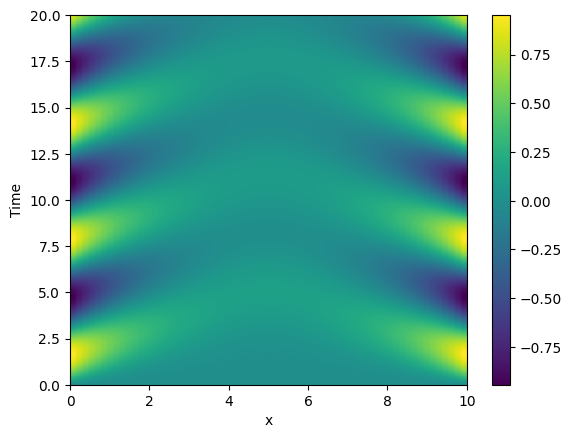

In [4]:
plot_kymograph(storage)


In [5]:
from pde import DiffusionPDE, ScalarField, UnitGrid
grid = UnitGrid([32, 32], periodic=[False, True]) # generate grid
state = ScalarField.random_uniform(grid, 0.2, 0.3) # generate initial condition

In [6]:
# set boundary conditions `bc` for all axes
bc_x_left = {"derivative": 0.1}
bc_x_right = {"value": "sin(y / 2)"}
bc_x = [bc_x_left, bc_x_right]
bc_y = "periodic"
eq = DiffusionPDE(bc=[bc_x, bc_y])


  0%|          | 0/10.0 [00:00<?, ?it/s]

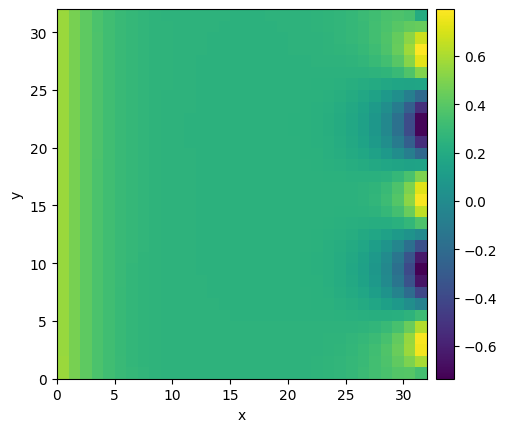

In [7]:
result = eq.solve(state, t_range=10, dt=0.005)
result.plot()

In [8]:
from pde import PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid
# define the PDE
a, b = 1, 3
d0, d1 = 1, 0.1
eq = PDE(
{
"u": f"{d0} * laplace(u) + {a} - ({b} + 1) * u + u**2 * v",
"v": f"{d1} * laplace(v) + {b} * u - u**2 * v",
}
)


In [13]:
# initialize state
grid = UnitGrid([16, 16])
u = ScalarField(grid, a, label="Field $u$")
v = ScalarField.random_normal(grid, label="Field $v$")
state = FieldCollection([u, v])

In [14]:
# simulate the pde
tracker = PlotTracker(interrupts=1, plot_args={"vmin": 0, "vmax": 5},movie='bruss.mp4')
sol = eq.solve(state, t_range=20, dt=1e-2, tracker=tracker)


In [15]:
grid = UnitGrid([64, 64]) # generate grid
state = ScalarField.random_uniform(grid, 0.2, 0.3) # generate initial condition


  0%|          | 0/10.0 [00:00<?, ?it/s]

Explicit stepper with a fixed time step did not receive any initial value for `dt`. Using dt=0.001, but specifying a value or enabling adaptive stepping is advisable.


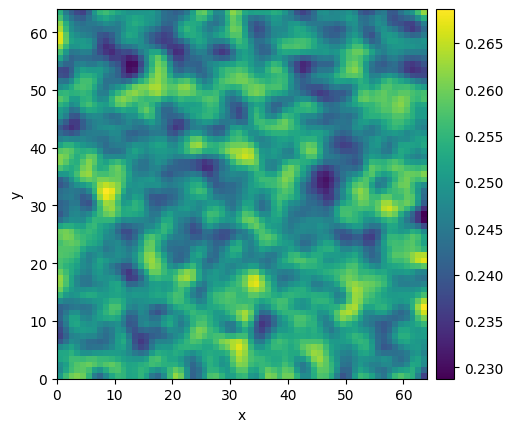

In [16]:
eq = DiffusionPDE(diffusivity=0.1) # define the pde
result = eq.solve(state, t_range=10)
result.plot()